In [1]:
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.colors

In [2]:
def xi(x,y):
    return x + 1j*y

In [3]:
def w(xi,ys=0.5,L=0.05):
    b = 1j * ((ys + L) / (1 - L*ys))
    c = 1j * ((ys - L) / (1 + L*ys))
    d = -1/np.conj(b)
    e = -1/np.conj(c)
    t = ((xi - b) * (xi - c) * (xi + (1/d)) * (xi + (1/e))) / (((1 + (np.abs(xi)**2))**2) * np.abs(b + (1/d)) * (c + (1/e)))
    t[np.abs(xi)>1] = np.nan
    return t

In [4]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
xx,yy = np.meshgrid(x,y)

In [5]:
YS = 0.8

In [6]:
ww = w(xi(xx,yy),ys=YS)

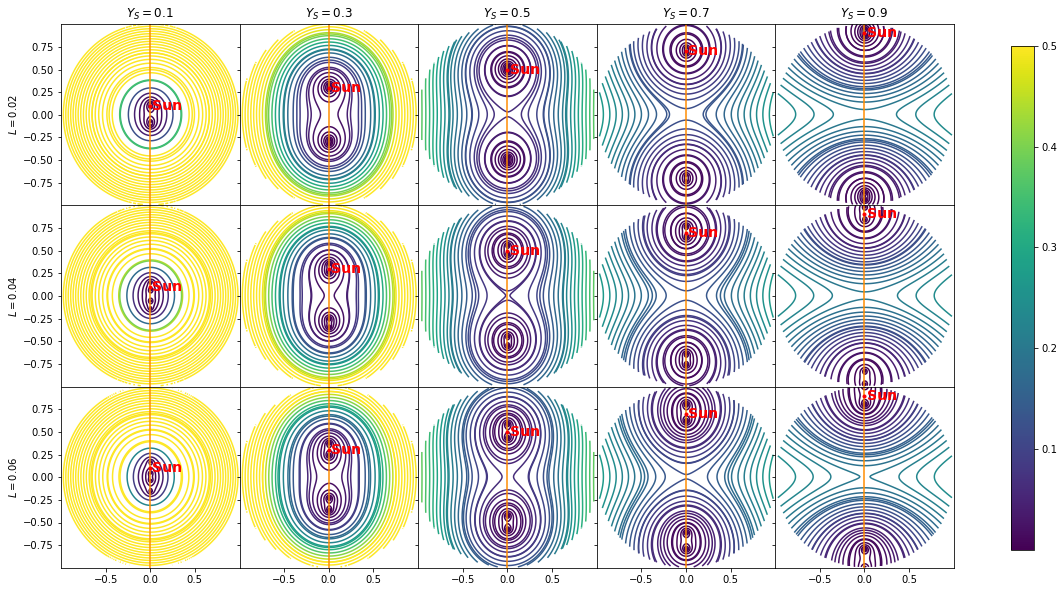

In [7]:
fig,axis = mpl.subplots(3,5,figsize=(16,10),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
axis_colorbar = fig.add_axes([0.95,0.15,0.02,0.70])

for i,YS in enumerate(np.arange(0.1,1,0.2)):
    for j,L in enumerate([0.02,0.04,0.06]):
        ww = w(xi(xx,yy),YS,L)
        axis[j,i].contour(np.abs(ww),extent=(-1,1,-1,1),vmax=0.5,vmin=1e-4,\
                          levels=np.logspace(np.log10(np.nanmin(np.abs(ww))),np.log10(np.nanmax(np.abs(ww))),15))
        axis[j,i].contour(np.abs(ww),extent=(-1,1,-1,1),vmax=0.5,vmin=1e-4,\
                          levels=np.linspace(np.nanmin(np.abs(ww)),np.nanmax(np.abs(ww)),20))
        axis[j,i].plot([0,0],[-1,1],"-",color="darkorange")
        axis[j,i].plot(0,YS,"o",color="red",ms=3)
        axis[j,i].text(0.025,YS,"Sun",ha="left",va="center",fontsize=14,color="red",weight="bold")
        if j == 0:
            axis[j,i].set_title(f"$Y_S={YS:.1f}$")
        if i == 0:
            axis[j,i].set_ylabel(f"$L={L:.2f}$")
        
axis[j,i].set_xticks(axis[j,i].get_xticks()[1:-1])
axis[j,i].set_yticks(axis[j,i].get_yticks()[1:-1])
norm= matplotlib.colors.Normalize(vmin=1e-4, vmax=0.5)
s = mpl.cm.ScalarMappable(norm=norm,cmap="viridis")
s.set_array([])
mpl.colorbar(s,cax=axis_colorbar)
mpl.show()
fig.savefig("polsing_test2.pdf")